# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import requests
from bs4 import BeautifulSoup
from html.parser import HTMLParser

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
weRateDogs_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
weRateDogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
content = response.content
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
imagePrediction_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
imagePrediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
twitter_list = []

for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                         'retweeted' : twitter_data['retweeted'],
                        'followers_count': twitter_data['user']['followers_count']})
tweet_json_df = pd.DataFrame.from_dict(twitter_list)

In [7]:
tweet_json_df.head()

,tweet_id,retweet_count,favorite_count,retweeted,followers_count
0,892420643555336193,8853,39467,False,3200889
1,892177421306343426,6514,33819,False,3200889
2,891815181378084864,4328,25461,False,3200889
3,891689557279858688,8964,42908,False,3200889
4,891327558926688256,9774,41048,False,3200889


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
weRateDogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
weRateDogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
weRateDogs_df['rating_denominator'].describe()

weRateDogs_df.loc[weRateDogs_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [11]:
numberOfNoNameDogs = weRateDogs_df.query('(name == "None")').name.count()


In [12]:
weRateDogs_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [13]:
weRateDogs_df['tweet_id'].value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [14]:
weRateDogs_df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [15]:
numberOfNoNameDogs = weRateDogs_df.query('(name == "None")').name.count()


In [16]:
numberOfNoNameDogs

745

In [17]:
imagePrediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
imagePrediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
188,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True


In [19]:
imagePrediction_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [20]:
imagePrediction_df['tweet_id'].value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

In [21]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   retweeted        2354 non-null   bool  
 4   followers_count  2354 non-null   int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [22]:
tweet_json_df['tweet_id'].value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: tweet_id, Length: 2354, dtype: int64

In [23]:
tweet_json_df.head(5)

,tweet_id,retweet_count,favorite_count,retweeted,followers_count
0,892420643555336193,8853,39467,False,3200889
1,892177421306343426,6514,33819,False,3200889
2,891815181378084864,4328,25461,False,3200889
3,891689557279858688,8964,42908,False,3200889
4,891327558926688256,9774,41048,False,3200889


### Quality issues
1. Some dog names are not real dog names. They are entered as None or have names like 'such' (the latter is lower case letters in the dataframe)

2. There are HTML tags in the source column in the weRateDogs_df

3. In weRateDogs_df, there is an instance where the denominator is equal to zero (done)


4. In weRateDogs_df, there are duplicate urls in the expanded urls column

5. In imagePredictions_df, there are duplicate urls in the jpg_url column

6. In imagePredictions_df, there are predictions that are not dogs, you can remove those

7. In ImagePredictions, some of the dog species are not formatted correctly. Some are upper case while others are lower case (done) You can make them all lower case


8. In ImagePredictions, you can get rid of the img_number column. This is not needed

9. The tweet id in the columns can be converted to a string

### Tidiness issues
1. You can merge all the tables together after converting the tweet id in all the columns to a string

2. You can get rid of the doggo, puppo, floofer, etc columns and merge them into one column called dog_stage

3. Though not necessary, I am going to create a new column that is the rating numerator divided by the rating denominator to normalize the dog rating in the weRateDogs_df

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
weRateDogs_df_copy = weRateDogs_df.copy()
imagePrediction_df_copy = imagePrediction_df.copy()
tweet_json_df_copy = tweet_json_df.copy()

### Issue #1:

#### Define: Getting Rid of Entries in the Name column that are not names

#### Code

In [25]:
#Entries in name column that are entered as None 
weRateDogs_df_copy = weRateDogs_df_copy[weRateDogs_df_copy.name != 'None']

In [26]:
#Entries in the name column that are lower case. The lower case entries are not names
regex = r"\b[a-z]\w*"
weRateDogs_df_copy['name'] = weRateDogs_df_copy['name'].str.replace(regex, 'LowerCase')
weRateDogs_df_copy = weRateDogs_df_copy.drop(weRateDogs_df_copy[weRateDogs_df_copy.name=='LowerCase'].index)

/var/folders/1_/d9l2qj0926j1w_57cv7g62hw0000gn/T/ipykernel_4603/4121706960.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  weRateDogs_df_copy['name'] = weRateDogs_df_copy['name'].str.replace(regex, 'LowerCase')


#### Test

In [27]:
found = weRateDogs_df_copy[weRateDogs_df_copy['name'].str.contains('None')]
len(found)

0

### Issue #2:

#### Define: There are unecessary HTML tags in the source column in the weRateDogs_df data frame

#### Code

In [28]:
#Removing ahref tags and html related stuff usiing beautiful soup
for i,row in weRateDogs_df_copy.iterrows():
    soup=BeautifulSoup(weRateDogs_df_copy["source"][i],"html.parser")
    parsed = soup.a.text
    weRateDogs_df_copy._set_value(i,'source',parsed)

#### Test

In [29]:
weRateDogs_df_copy.source.value_counts()

Twitter for iPhone     1436
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 9
Name: source, dtype: int64

### Issue #3:

#### Define: Removing retweets and everything associated with it.

#### Code

In [30]:
weRateDogs_df_copy = weRateDogs_df_copy[weRateDogs_df_copy['retweeted_status_id'].isnull()]
weRateDogs_df_copy = weRateDogs_df_copy.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis=1)

#### Test

In [31]:
weRateDogs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   int64 
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   doggo               1391 non-null   object
 9   floofer             1391 non-null   object
 10  pupper              1391 non-null   object
 11  puppo               1391 non-null   object
dtypes: int64(3), object(9)
memory usage: 141.3+ KB


### Issue #4:

#### Define: Remove instance where the zero denominator

#### Code

In [32]:
weRateDogs_df_copy = weRateDogs_df_copy[weRateDogs_df_copy['rating_denominator'] != 0]

#### Test

In [33]:
weRateDogs_df_copy.loc[weRateDogs_df_copy['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define: Remove duplicate in expanded urls

#### Code

In [34]:
weRateDogs_df_copy = weRateDogs_df_copy.drop_duplicates(subset='expanded_urls', keep="first")

#### Test

In [35]:
weRateDogs_df_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/690728923253055490/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/690021994562220032/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/690248561355657216/photo/1                                                                                                                                                          

### Issue #6:

#### Define: Combing the various dog stage columns into one column called dog stage and dropping the uneeded columns

#### Code

In [36]:
weRateDogs_df_copy = weRateDogs_df_copy.replace('None', np.nan)
weRateDogs_df_copy['dog_types'] = (weRateDogs_df_copy['doggo'].fillna(weRateDogs_df_copy['floofer'])
                              .fillna(weRateDogs_df_copy['puppo'])
                              .fillna(weRateDogs_df_copy['pupper']))
weRateDogs_df_copy.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)


#### Test

In [37]:
weRateDogs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   int64 
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   dog_types           184 non-null    object
dtypes: int64(3), object(6)
memory usage: 108.7+ KB


In [38]:
weRateDogs_df_copy['dog_types'].value_counts()

pupper     121
doggo       42
puppo       16
floofer      5
Name: dog_types, dtype: int64

**Extra**

**Define:** Normalizing the dog rating by dividing the rating numerator by the rating denominator

**Code**

In [39]:
#Dividing the rating numerator by the rating denominator to create decimal column
weRateDogs_df_copy['decimal_rating'] = weRateDogs_df_copy['rating_numerator']/weRateDogs_df_copy['rating_denominator']

**Test**

In [40]:
weRateDogs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1391 non-null   int64  
 1   timestamp           1391 non-null   object 
 2   source              1391 non-null   object 
 3   text                1391 non-null   object 
 4   expanded_urls       1391 non-null   object 
 5   rating_numerator    1391 non-null   int64  
 6   rating_denominator  1391 non-null   int64  
 7   name                1391 non-null   object 
 8   dog_types           184 non-null    object 
 9   decimal_rating      1391 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 119.5+ KB


In [41]:
weRateDogs_df_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,decimal_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,1.2


### Issue #7: 

#### Define: Getting rid of false image predictions that are not dogs


#### Code

In [42]:
imagePrediction_df_copy = imagePrediction_df_copy[((imagePrediction_df_copy['p1_dog'] != False) & 
                  (imagePrediction_df_copy['p2_dog'] != False) & 
                  (imagePrediction_df_copy['p3_dog'] != False))]

#### Test

In [43]:
imagePrediction_df_copy['p1_dog'].value_counts()

True    1243
Name: p1_dog, dtype: int64

In [44]:
imagePrediction_df_copy['p2_dog'].value_counts()

True    1243
Name: p2_dog, dtype: int64

In [45]:
imagePrediction_df_copy['p3_dog'].value_counts()

True    1243
Name: p3_dog, dtype: int64

### Issue #8:

#### Define: Getting rid of duplicate urls in JPG_URL column

#### Code

In [46]:
imagePrediction_df_copy = imagePrediction_df_copy.drop_duplicates(subset='jpg_url', keep="first") 

#### Test

In [47]:
imagePrediction_df_copy['jpg_url'].value_counts()

https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg    1
https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg    1
https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg    1
https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg    1
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg    1
                                                  ..
https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg    1
https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg    1
https://pbs.twimg.com/media/CYkrNIVWcAMswmP.jpg    1
https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg    1
https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg    1
Name: jpg_url, Length: 1206, dtype: int64

### Issue #9:

#### Define: Making all dog entries lower case since the casing is inconsistent

#### Code

In [48]:
#Fixing the case issue with some lower case dogs

imagePrediction_df_copy['p1'] = imagePrediction_df_copy['p1'].apply(str.lower)
imagePrediction_df_copy['p2'] = imagePrediction_df_copy['p2'].apply(str.lower)
imagePrediction_df_copy['p3'] = imagePrediction_df_copy['p3'].apply(str.lower)



#### Test

In [49]:
imagePrediction_df_copy['p1']

0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2066             irish_terrier
2067                pomeranian
2070                    basset
2072                 chihuahua
2073                 chihuahua
Name: p1, Length: 1206, dtype: object

In [50]:
imagePrediction_df_copy['p2']

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2066          irish_setter
2067            eskimo_dog
2070      english_springer
2072              malamute
2073              pekinese
Name: p2, Length: 1206, dtype: object

In [51]:
imagePrediction_df_copy['p3']

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2066       chesapeake_bay_retriever
2067                       pembroke
2070    german_short-haired_pointer
2072                         kelpie
2073                       papillon
Name: p3, Length: 1206, dtype: object

### Issue #10:

#### Define: Removing the img_num column

#### Code

In [52]:
imagePrediction_df_copy = imagePrediction_df_copy.drop(['img_num'], axis=1)

#### Test

In [53]:
imagePrediction_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   int64  
 1   jpg_url   1206 non-null   object 
 2   p1        1206 non-null   object 
 3   p1_conf   1206 non-null   float64
 4   p1_dog    1206 non-null   bool   
 5   p2        1206 non-null   object 
 6   p2_conf   1206 non-null   float64
 7   p2_dog    1206 non-null   bool   
 8   p3        1206 non-null   object 
 9   p3_conf   1206 non-null   float64
 10  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 88.3+ KB


### Issue #11:

#### Define: Convert Tweet Id for all tables into a string for merging purposes

#### Code

In [54]:
tweet_json_df_copy.tweet_id = tweet_json_df_copy.tweet_id.astype(str)
imagePrediction_df_copy.tweet_id = imagePrediction_df_copy.tweet_id.astype(str)
weRateDogs_df_copy.tweet_id = weRateDogs_df_copy.tweet_id.astype(str)

#### Test

In [55]:
tweet_json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   retweeted        2354 non-null   bool  
 4   followers_count  2354 non-null   int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [56]:
imagePrediction_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   p1        1206 non-null   object 
 3   p1_conf   1206 non-null   float64
 4   p1_dog    1206 non-null   bool   
 5   p2        1206 non-null   object 
 6   p2_conf   1206 non-null   float64
 7   p2_dog    1206 non-null   bool   
 8   p3        1206 non-null   object 
 9   p3_conf   1206 non-null   float64
 10  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 88.3+ KB


In [57]:
weRateDogs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1391 non-null   object 
 1   timestamp           1391 non-null   object 
 2   source              1391 non-null   object 
 3   text                1391 non-null   object 
 4   expanded_urls       1391 non-null   object 
 5   rating_numerator    1391 non-null   int64  
 6   rating_denominator  1391 non-null   int64  
 7   name                1391 non-null   object 
 8   dog_types           184 non-null    object 
 9   decimal_rating      1391 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 119.5+ KB


### Issue #12:

#### Define: Merging all the tables together

#### Code

In [58]:
twitter_archive_master = pd.merge(weRateDogs_df_copy, imagePrediction_df_copy, on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, tweet_json_df_copy, on='tweet_id')

#### Test

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            852 non-null    object 
 1   timestamp           852 non-null    object 
 2   source              852 non-null    object 
 3   text                852 non-null    object 
 4   expanded_urls       852 non-null    object 
 5   rating_numerator    852 non-null    int64  
 6   rating_denominator  852 non-null    int64  
 7   name                852 non-null    object 
 8   dog_types           111 non-null    object 
 9   decimal_rating      852 non-null    float64
 10  jpg_url             852 non-null    object 
 11  p1                  852 non-null    object 
 12  p1_conf             852 non-null    float64
 13  p1_dog              852 non-null    bool   
 14  p2                  852 non-null    object 
 15  p2_conf             852 non-null    float64
 16  p2_dog  

In [60]:
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,decimal_rating,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,followers_count
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3,...,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,False,3200889
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,False,3200889
2,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,1.2,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,False,3200889
3,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,1.3,...,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4429,28226,False,3200889
4,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,1.4,...,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467,False,3200889


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. We can find out what the most popular dog name is

2. We can find out which dog stage has the highest rating

3. We can find out which dog was the most popular in terms of favorites and retweets

Text(0.5, 1.0, 'Most Common Dog Name')

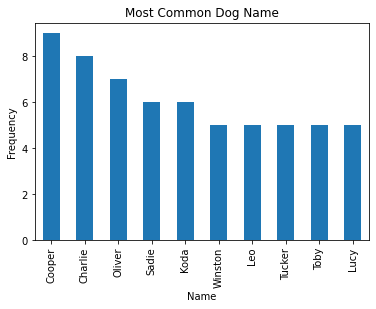

In [62]:
top_10 = twitter_archive_master['name'].value_counts()[:10]
top_10.plot.bar(xlabel="Name", ylabel="Frequency")
plt.title('Most Common Dog Name')

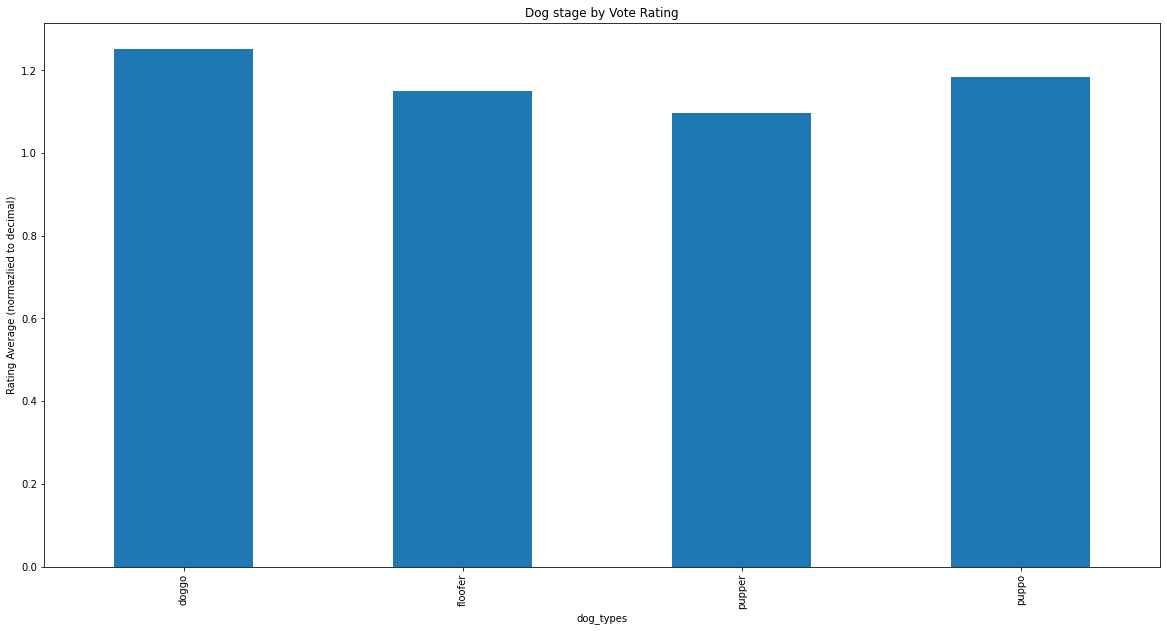

In [63]:
#Finding out the most pouplar dog stage by voting average (dividing rating numerator by rating denominator)
dfg = twitter_archive_master.groupby('dog_types')['decimal_rating'].mean()

# plot the groupby result
ax = dfg.plot.bar(figsize=(20, 10), ylabel='Rating Average (normazlied to decimal)')
plt.title("Dog stage by Vote Rating")
plt.show()

In [64]:
#finding the most popular dog by favorites
favorite_df = twitter_archive_master.sort_values(by=['favorite_count'], ascending=False)

In [65]:
favorite_df[['name', 'favorite_count']]

,name,favorite_count
32,Duddles,107956
223,Stephan,107015
62,Jamesy,106827
177,Bo,95450
53,Zoey,85011
...,...,...
831,Fwed,211
828,Reese,203
847,Christoper,196
851,Walter,129


In [66]:
retweet_df = twitter_archive_master.sort_values(by=['retweet_count'], ascending=False)

In [67]:
retweet_df[['name', 'retweet_count']]

,name,retweet_count
223,Stephan,56625
32,Duddles,45849
177,Bo,42228
62,Jamesy,32883
181,Buddy,31314
...,...,...
843,Keet,57
847,Christoper,51
851,Walter,48
768,Bloo,45
